# Análisis Univariado de Datos Moleculares en Gliomas Difusos - Optención de Biomarcadores

Este proyecto se centra en el análisis univariado de datos de expresión proteica y génica en pacientes con gliomas difusos. El objetivo es identificar proteínas y genes cuya expresión se asocie significativamente con el outcome clínico de los pacientes.

⚠️ Estado: Análisis en progreso.

## Dataset

El dataset incluye:

- Proteómica: expresión relativa de 174 proteínas. Se realizó imputación de valores faltantes y escalado de los datos.

- Transcriptómica: expresión de 145 transcritos.

## Metodología

Proteómica:

- Imputación de datos faltantes

- Escalado estándar (z-score)

- Análisis univariado para evaluar la significancia de cada proteína respecto al outcome clínico (adj.P.Val < 0.05).

- Se reporta también el log2 fold change (logFC) para evaluar la magnitud del cambio en expresión.

Resultados Univariados
Proteínas Significativas (adj.P.Val < 0.05)

| Protein           | adj.P.Val   | logFC  |
|------------------|------------|--------|
| Src_pY416_p       | 0.017681   | 7.463  |
| EGFR_pY1068_p     | 0.003745   | 4.844  |
| p27_p             | 0.000876   | -3.858 |
| HER2_pY1248_p     | 0.009947   | 3.676  |
| Cyclin_B1_p       | 0.011747   | 3.378  |
| PRAS40_pT246_p    | 0.009947   | 2.742  |
| 4E-BP1_pS65_p     | 0.036569   | -1.992 |

Transcriptómica:

Análisis univariado por cada gen, usando valores ajustados de p (adj.P.Val) y logFC.

| Gene.symbol | adj.P.Val      | logFC  |
|------------|---------------|--------|
| STAT5A     | 3.07e-12      | 0.870  |
| RPS6KA1    | 5.62e-11      | 0.917  |
| SYK        | 4.48e-10      | 0.955  |
| AR         | 5.44e-07      | 1.111  |
| WWTR1      | 3.26e-04      | 0.908  |
| CAV1       | 2.40e-03      | 1.068  |

Nota: logFC positivo indica sobreexpresión en el grupo de interés; logFC negativo indica subexpresión.

## Tecnologías y Herramientas

- Lenguaje: Python 🐍

- Librerías: pandas, NumPy, SciPy, Matplotlib, Seaborn

- Procesamiento: imputación, escalado, análisis estadístico univariado

### Análisis transcriptómico

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Análisis multiomicos\Análisis multi-ómico de gliomas difusos\Glioma.csv")
data.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,TSC1,TSC2,WWTR1,XRCC1,XRCC5,YAP1,YBX1,YWHAB,YWHAE,YWHAZ
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,...,1455.8422,1825.0472,1514.6130,759.8070,6062.5131,2080.1343,7140.3398,10055.3807,30969.1630,9261.5901
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,...,1194.3738,1685.1381,526.3176,693.4418,6973.3943,545.6702,11239.4509,8656.4989,19796.6446,12575.4957
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,...,1088.2018,2360.8727,905.4451,804.4670,6655.3614,730.4312,9499.7415,7289.4220,20114.1557,18329.4385
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,...,1397.5452,2081.1456,414.7801,793.3856,4214.4562,753.8357,4590.5217,11778.0430,22488.9192,12954.6539
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,...,1064.6498,1486.5313,4793.0874,1002.0721,5197.6792,1442.1881,9880.2321,7364.2768,30595.9387,9029.4240


In [3]:
columnas = data.columns
c_c_m= columnas[0:12]

In [4]:
datos_clinico_moleculares = data[c_c_m]
datos_clinico_moleculares.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,IDH.status,outcome
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,Mutant,1
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,Mutant,1
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,Mutant,1
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,Mutant,1
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,Mutant,1


In [5]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import numpy as np

In [6]:
datos_clinico_moleculares.groupby(['histological_type','outcome'])['outcome'].count()

histological_type  outcome
astrocytoma        1           90
oligoastrocytoma   1           94
oligodendroglioma  0          122
Name: outcome, dtype: int64

In [7]:
grupo_superviviente = data[data['outcome'] == 0].index

grupo_dead = data[data['outcome'] == 1].index

In [8]:
data.shape

(306, 331)

In [9]:
transcriptomica = data.loc[:, "ACACA":'YWHAZ']
transcriptomica.shape

(306, 145)

In [10]:
results = []
columnas = transcriptomica.columns

for protein in columnas:
    vals_A = data.loc[grupo_superviviente, protein]
    vals_B = data.loc[grupo_dead, protein]
    
    # test t
    t_stat, p_val = ttest_ind(vals_A, vals_B)
    
    # log2 fold change
    logFC = np.log2(vals_B.mean() / vals_A.mean())
    
    results.append([protein, p_val, t_stat, logFC])

res_df = pd.DataFrame(results, columns=["Gene.symbol","P.Value","t","logFC"])


In [11]:
# Supongamos que ya tienes tu tabla de resultados
res_df = pd.DataFrame(results, columns=["Gene.symbol","P.Value","t","logFC"])

# Ajustar p-values con FDR (Benjamini-Hochberg)
res_df["adj.P.Val"] = multipletests(res_df["P.Value"], method="fdr_bh")[1]

# Ordenar por adj.P.Val
res_df = res_df.sort_values("adj.P.Val")

In [12]:
res_df

,Gene.symbol,P.Value,t,logFC,adj.P.Val
127,STAT5A,2.118994e-14,-8.032658,0.869782,3.072542e-12
115,RPS6KA1,8.516688e-13,-7.470894,0.917317,5.624804e-11
141,YBX1,1.163753e-12,-7.422164,0.558422,5.624804e-11
0,ACACA,1.411981e-11,7.024598,-0.364326,4.478645e-10
130,SYK,1.853233e-11,-6.980363,0.954880,4.478645e-10
...,...,...,...,...,...
68,KDR,9.121491e-01,0.110420,-0.014519,9.380257e-01
111,RAF1,9.298670e-01,-0.088085,0.002829,9.495120e-01
62,HSPA1A,9.539135e-01,0.057841,-0.025178,9.672549e-01
134,TP53,9.623893e-01,-0.047194,0.004063,9.690726e-01


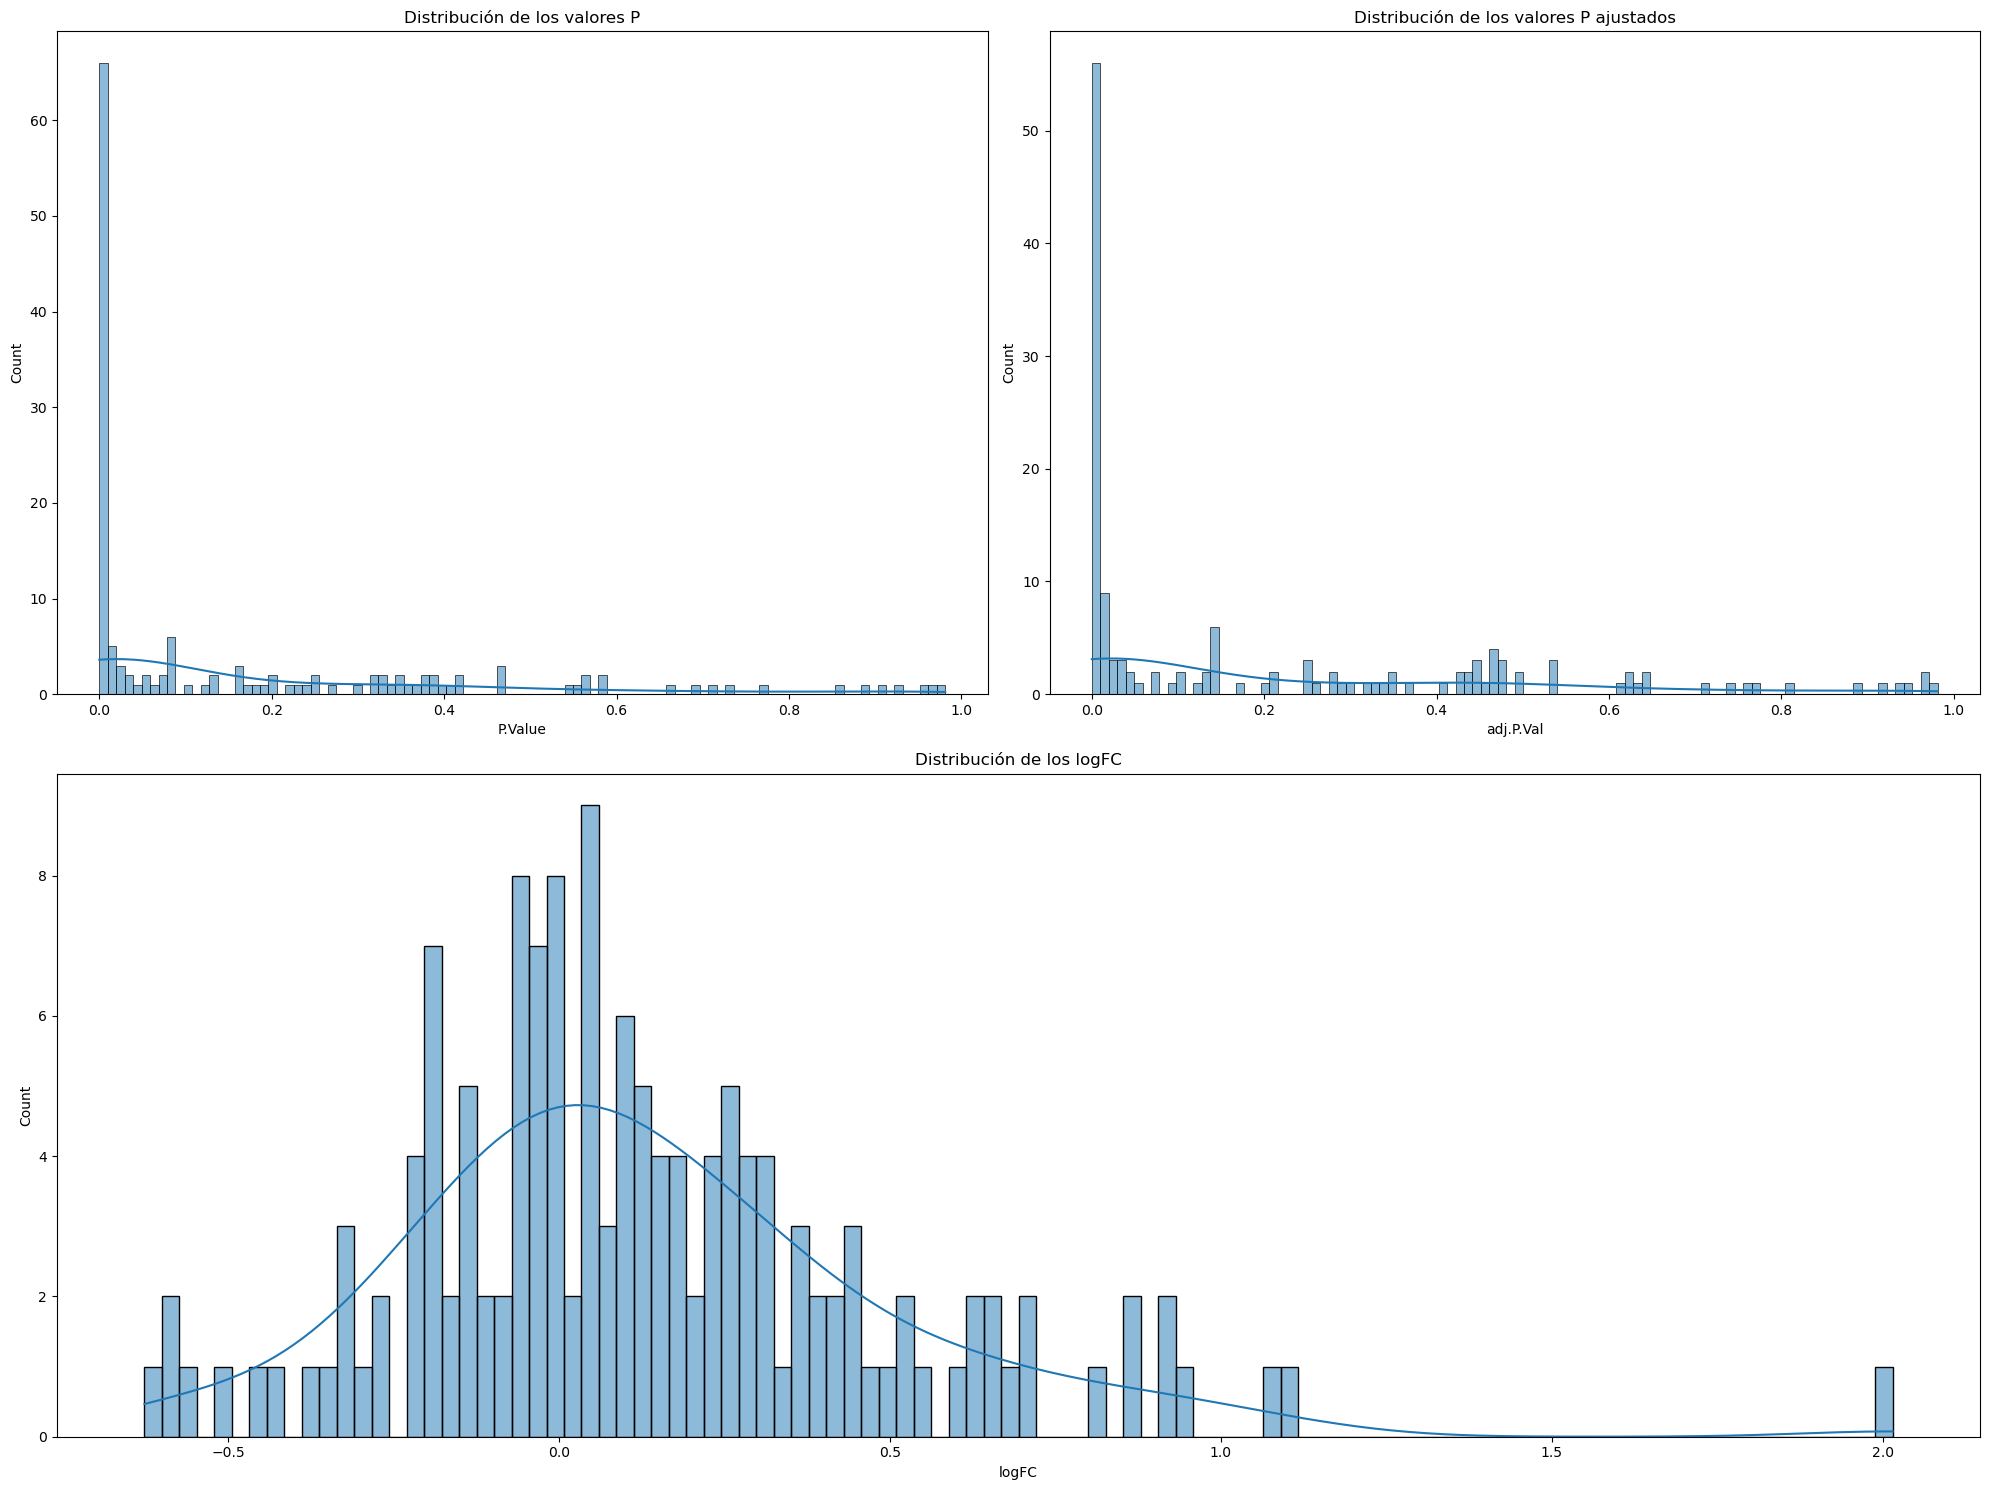

In [13]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(2, 2)  # 2 filas x 2 columnas

# Primera fila (dos gráficos)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Segunda fila (una sola gráfica que ocupa las dos columnas)
ax3 = fig.add_subplot(gs[1, :])

# Graficar
sns.histplot(res_df['P.Value'], bins=100, kde=True, ax=ax1)
ax1.set_title('Distribución de los valores P')

sns.histplot(res_df['adj.P.Val'], bins=100, kde=True, ax=ax2)
ax2.set_title('Distribución de los valores P ajustados')

sns.histplot(res_df['logFC'], bins=100, kde=True, ax=ax3)
ax3.set_title('Distribución de los logFC')

plt.tight_layout()
plt.show()

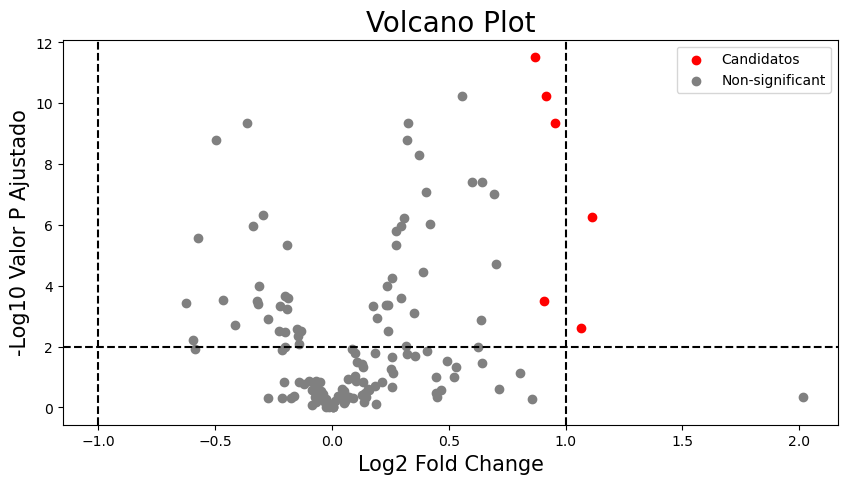

In [14]:

sig = res_df.loc[(res_df['adj.P.Val'] <= 0.05) & (abs(res_df['logFC']) > 0.85)]
non_sig = res_df.loc[~res_df.index.isin(sig.index)]

plt.figure(figsize=(10, 5))
plt.scatter(sig['logFC'], -np.log10(sig['adj.P.Val']), color='red', label='Candidatos')
plt.scatter(non_sig['logFC'], -np.log10(non_sig['adj.P.Val']), color='grey', label='Non-significant')
plt.axhline(y=-np.log10(0.01), color='black', linestyle='--')
plt.axvline(x=-1, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')
plt.xlabel('Log2 Fold Change', fontsize=15)
plt.ylabel('-Log10 Valor P Ajustado', fontsize=15)
plt.title('Volcano Plot', fontsize=20)
plt.legend(loc='best')
plt.show()

In [15]:
sig

,Gene.symbol,P.Value,t,logFC,adj.P.Val
127,STAT5A,2.118994e-14,-8.032658,0.869782,3.072542e-12
115,RPS6KA1,8.516688e-13,-7.470894,0.917317,5.624804e-11
130,SYK,1.853233e-11,-6.980363,0.954880,4.478645e-10
9,AR,5.625266e-08,-5.569474,1.110989,5.437757e-07
137,WWTR1,7.575212e-05,-4.012347,0.908168,3.257995e-04
25,CAV1,7.775013e-04,-3.394974,1.067556,2.398674e-03


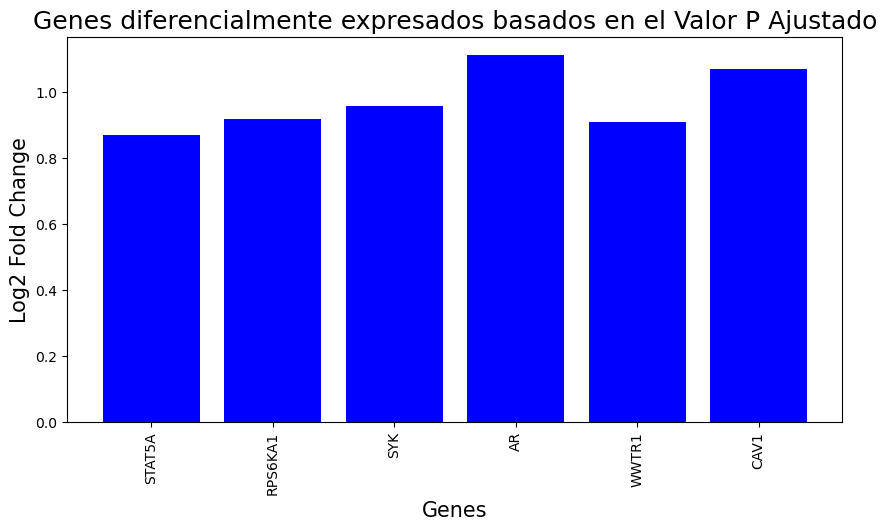

In [16]:
# Visualización de los genes más significativos
plt.figure(figsize=(10,5))
plt.bar(sig['Gene.symbol'], sig['logFC'], color='blue')
plt.xlabel('Genes', fontsize=15)
plt.ylabel('Log2 Fold Change', fontsize=15)
plt.xticks(rotation=90)
plt.title('Genes diferencialmente expresados basados en el Valor P Ajustado', fontsize=18)
plt.show()

In [17]:
sig[['Gene.symbol', 'adj.P.Val', 'logFC']]

,Gene.symbol,adj.P.Val,logFC
127,STAT5A,3.072542e-12,0.869782
115,RPS6KA1,5.624804e-11,0.917317
130,SYK,4.478645e-10,0.954880
9,AR,5.437757e-07,1.110989
137,WWTR1,3.257995e-04,0.908168
25,CAV1,2.398674e-03,1.067556


## Análisis proteomico

In [18]:
proteomica = data.loc[:, "14-3-3_beta_p":'p90RSK_pT359_S363_p']
proteomica.shape

(306, 174)

In [19]:


resultados = []

for col in proteomica.columns:
    # usar los índices ya creados
    vals_A = proteomica.loc[grupo_superviviente, col]
    vals_B = proteomica.loc[grupo_dead, col]
    
    # evitar problemas si alguna columna está vacía
    if len(vals_A) == 0 or len(vals_B) == 0:
        continue
    
    # test t
    t_stat, p_val = ttest_ind(vals_A, vals_B, equal_var=False, nan_policy="omit")
    
    # fold change promedio
    logFC = vals_A.mean() - vals_B.mean()
    
    resultados.append({
        "Protein.symbol": col,
        "logFC": logFC,
        "t": t_stat,
        "P.Value": p_val
    })

df_pro = pd.DataFrame(resultados)

# Ajustar p-valores
df_pro["adj.P.Val"] = multipletests(df_pro["P.Value"], method="fdr_bh")[1]

# Ordenar
df_pro = df_pro.sort_values(["adj.P.Val", "logFC"], ascending=[True, False]).reset_index(drop=True)

print(df_pro.head(10))  # top 10 proteínas más diferenciales

  Protein.symbol     logFC         t       P.Value     adj.P.Val
0          Syk_p -0.410570 -6.724882  1.288008e-10  2.241133e-08
1           AR_p -0.155769 -6.118436  3.357540e-09  1.947373e-07
2    YAP_pS127_p -0.305577 -6.175567  2.606283e-09  1.947373e-07
3          YAP_p -0.110941 -5.295353  2.292305e-07  9.971528e-06
4         ACC1_p  0.278011  4.935016  1.504180e-06  5.234548e-05
5        c-Kit_p  0.359591  4.875148  1.851407e-06  5.369080e-05
6  STAT3_pY705_p -0.242550 -4.735220  3.413319e-06  8.484535e-05
7  HER3_pY1289_p  0.162812  4.697917  4.741287e-06  1.031230e-04
8         DJ-1_p -0.127295 -4.521824  9.230243e-06  1.784514e-04
9     ACC_pS79_p  0.202212  4.393961  1.776737e-05  3.091523e-04


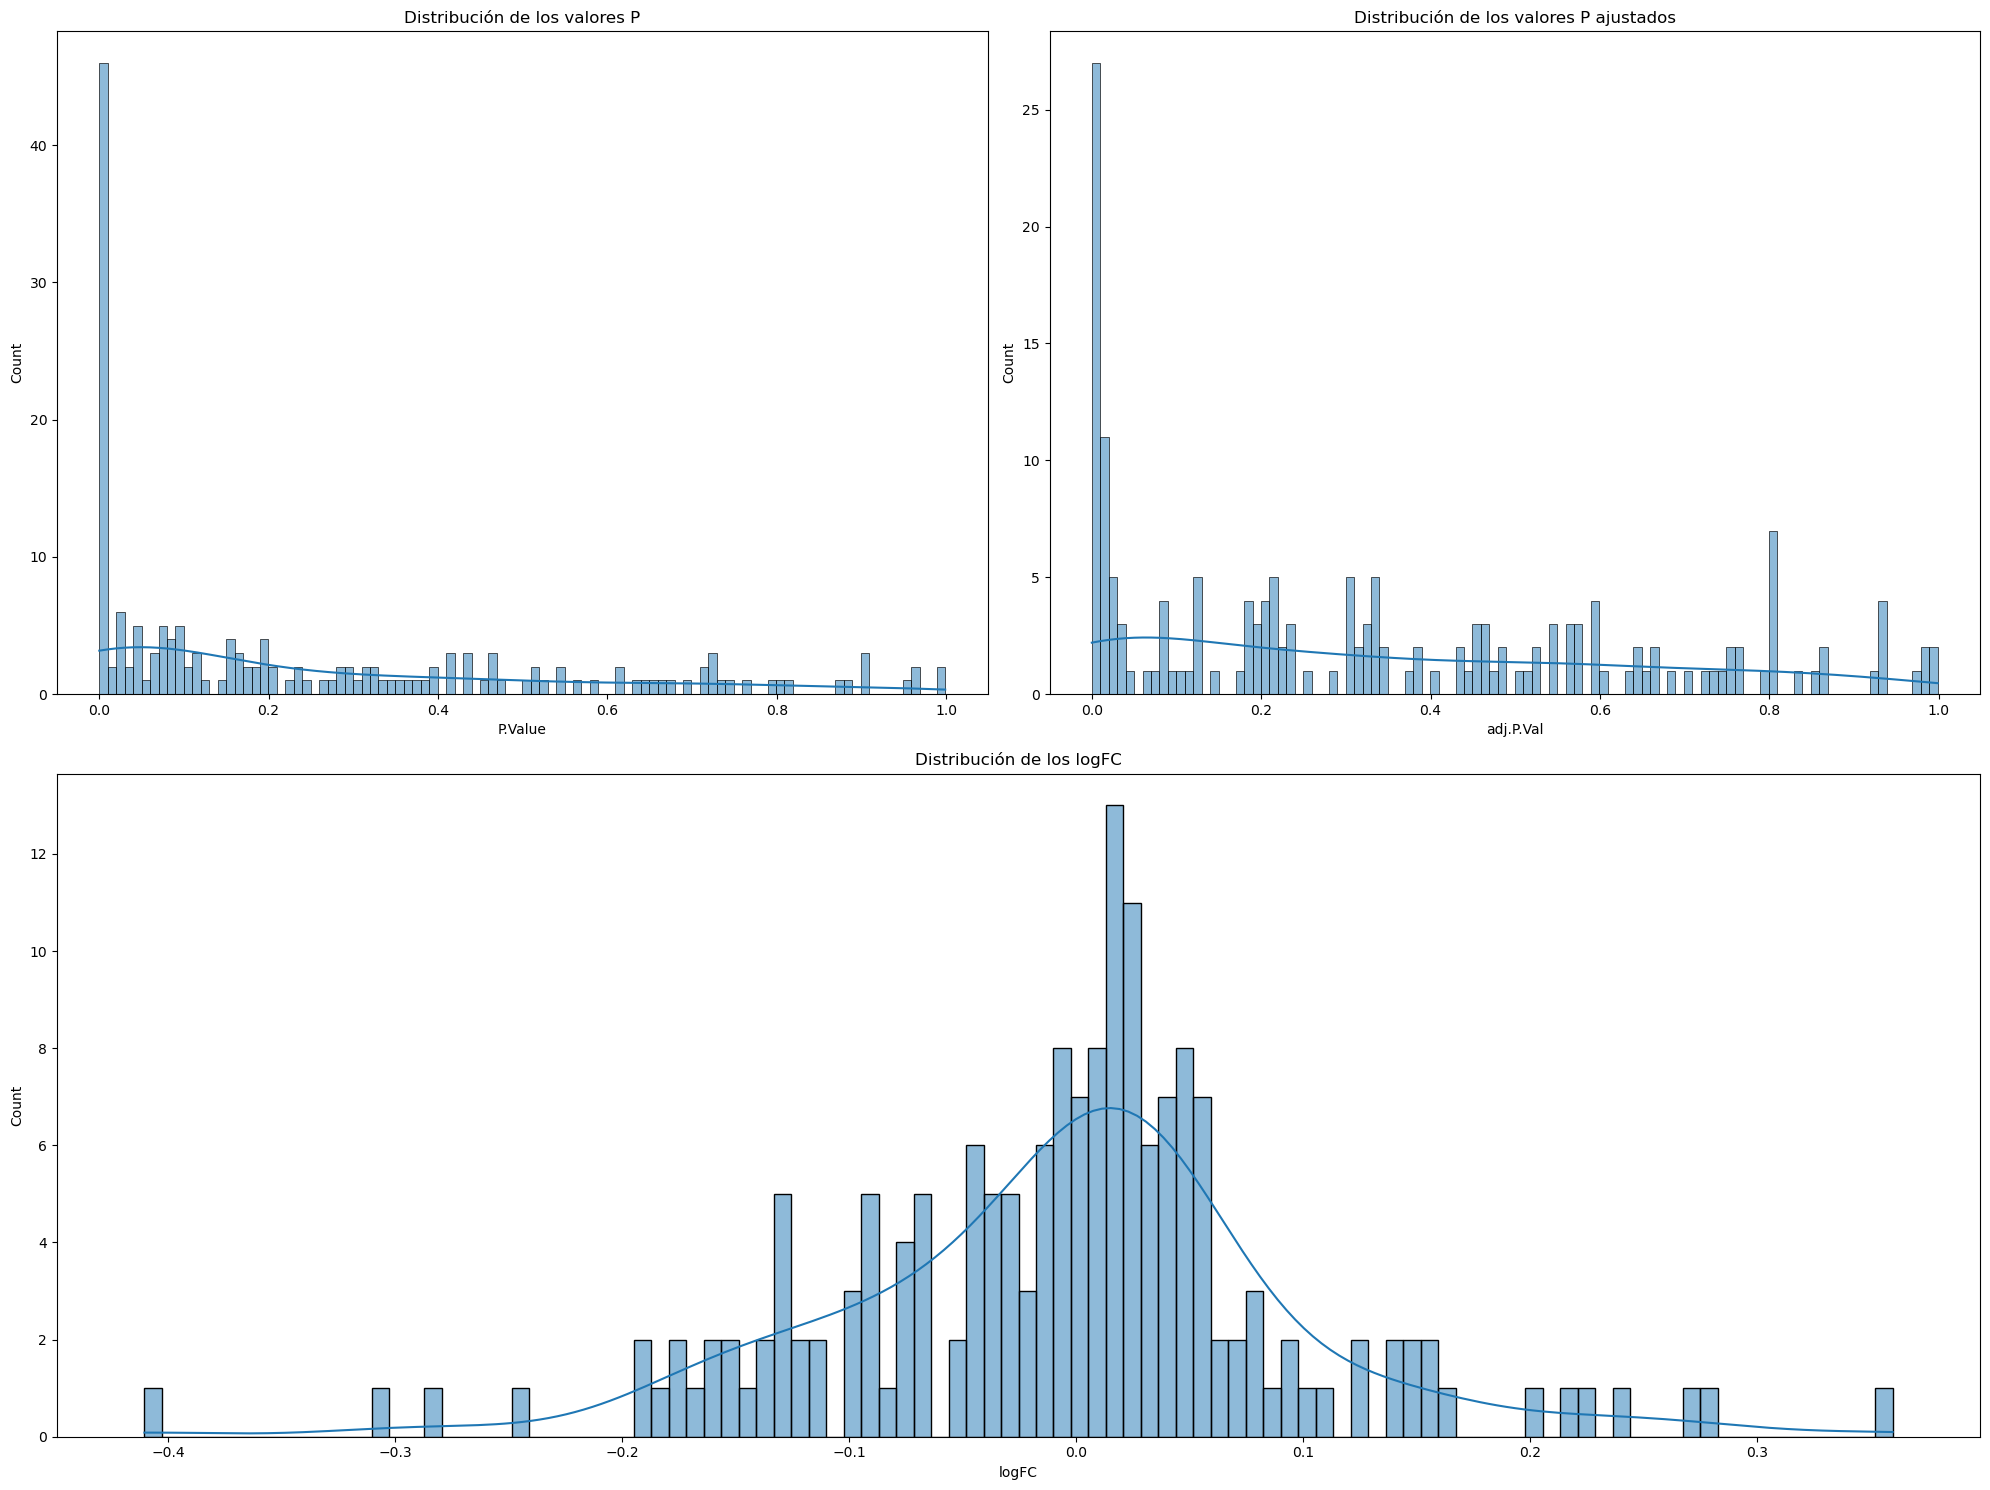

In [20]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(2, 2)  # 2 filas x 2 columnas

# Primera fila (dos gráficos)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Segunda fila (una sola gráfica que ocupa las dos columnas)
ax3 = fig.add_subplot(gs[1, :])

# Graficar
sns.histplot(df_pro['P.Value'], bins=100, kde=True, ax=ax1)
ax1.set_title('Distribución de los valores P')

sns.histplot(df_pro['adj.P.Val'], bins=100, kde=True, ax=ax2)
ax2.set_title('Distribución de los valores P ajustados')

sns.histplot(df_pro['logFC'], bins=100, kde=True, ax=ax3)
ax3.set_title('Distribución de los logFC')

plt.tight_layout()
plt.show()

### Análisis proteomico - normalización de datos + imputación + escalado

In [21]:

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests

# === 1. Selección de datos ===
# columnas clínicas
clinical_cols = ["years_to_birth", "gender", "histological_type", "race",
                 "ethnicity", "radiation_therapy", "Grade", "Mutation.Count",
                 "Percent.aneuploidy", "IDH.status", "outcome"]


sample_meta = data[clinical_cols]
protein_cols = proteomica.columns
X = data[protein_cols]

# --- 2. Filtrado de proteínas con muchos NA ---
threshold = 0.2
mask = X.isnull().mean() < threshold
X_filtered = X.loc[:, mask]
print(f"Proteínas después de filtrado: {X_filtered.shape[1]}")

# --- 3. Imputación KNN de valores faltantes ---
imputer = KNNImputer(n_neighbors=3)
X_imputed = imputer.fit_transform(X_filtered)
X_imputed = pd.DataFrame(X_imputed, columns=X_filtered.columns, index=X_filtered.index)

# --- 4. Estandarización (centrado y escalado) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_filtered.columns, index=X_filtered.index)

# --- 5. Test univariado y cálculo de logFC ---
grupo_superviviente = sample_meta[sample_meta["outcome"] == 0].index
grupo_dead = sample_meta[sample_meta["outcome"] == 1].index

results = []
for protein in X_scaled.columns:
    vals_0 = X_scaled.loc[grupo_superviviente, protein]
    vals_1 = X_scaled.loc[grupo_dead, protein]

    # logFC calculado sobre datos imputados originales
    mean_0 = X_imputed.loc[grupo_superviviente, protein].mean()
    mean_1 = X_imputed.loc[grupo_dead, protein].mean()
    
    # Verificar que no sean NaN
    if not np.isnan(mean_0) and not np.isnan(mean_1):
        logFC = np.log2((mean_1 + 1e-9) / (mean_0 + 1e-9))
    else:
        logFC = np.nan

    # t-test en datos escalados
    t_stat, p_val = ttest_ind(vals_0, vals_1, equal_var=False)

    results.append([protein, logFC, t_stat, p_val])

df_results = pd.DataFrame(results, columns=["Protein", "logFC", "t_stat", "p_value"])

# --- 6. Ajuste por FDR ---
df_results["adj.P.Val"] = multipletests(df_results["p_value"], method="fdr_bh")[1]

# --- 7. Ordenar por |logFC| y adj.P.Val ---
df_results["abs_logFC"] = df_results["logFC"].abs()
df_proteomica_pre = df_results.sort_values(
    by=["abs_logFC", "adj.P.Val"],
    ascending=[False, True]
).reset_index(drop=True)

# --- 8. Filtrar proteínas con logFC calculable ---
df_proteomica_pre = df_proteomica_pre.dropna(subset=["logFC"])

# Mostrar top 20
print(df_proteomica_pre.head(20))


Proteínas después de filtrado: 174


C:\Users\HP\AppData\Local\Temp\ipykernel_6064\577733702.py:47: RuntimeWarning: invalid value encountered in log2
  logFC = np.log2((mean_1 + 1e-9) / (mean_0 + 1e-9))


           Protein     logFC    t_stat   p_value  adj.P.Val  abs_logFC
0   p70S6K_pT389_p -7.585829  2.304274  0.022101   0.078480   7.585829
1      Src_pY416_p  7.463381 -2.920331  0.003761   0.017681   7.463381
2          XRCC1_p  7.362408 -1.359724  0.175004   0.320533   7.362408
3           eEF2_p  5.761162 -1.382331  0.168024   0.314367   5.761162
4           ERK2_p  5.340188 -1.773030  0.077481   0.193984   5.340188
5          RBM15_p -5.269334 -0.857887  0.391710   0.540933   5.269334
6    14-3-3_beta_p -5.071927  1.833001  0.068097   0.182290   5.071927
7    EGFR_pY1068_p  4.844218 -3.544126  0.000473   0.003745   4.844218
8       Bap1-c-4_p  4.729276  1.768993  0.078040   0.193984   4.729276
9     AMPK_pT172_p  4.327816  0.940588  0.347680   0.504136   4.327816
10           p27_p -3.858045  4.062352  0.000065   0.000876   3.858045
11   HER2_pY1248_p  3.676464 -3.229966  0.001427   0.009947   3.676464
12          Chk1_p  3.583804 -0.547746  0.584342   0.701211   3.583804
13    

In [22]:
df_proteomica_pre[df_proteomica_pre['adj.P.Val'] < 0.05].count()

Protein      7
logFC        7
t_stat       7
p_value      7
adj.P.Val    7
abs_logFC    7
dtype: int64

In [23]:
df_proteomica_pre[df_proteomica_pre['adj.P.Val'] < 0.05]

,Protein,logFC,t_stat,p_value,adj.P.Val,abs_logFC
1,Src_pY416_p,7.463381,-2.920331,0.003761,0.017681,7.463381
7,EGFR_pY1068_p,4.844218,-3.544126,0.000473,0.003745,4.844218
10,p27_p,-3.858045,4.062352,0.000065,0.000876,3.858045
11,HER2_pY1248_p,3.676464,-3.229966,0.001427,0.009947,3.676464
13,Cyclin_B1_p,3.378303,-3.104519,0.002093,0.011747,3.378303
16,PRAS40_pT246_p,2.741953,-3.209938,0.001482,0.009947,2.741953
33,4E-BP1_pS65_p,-1.991640,2.606643,0.009668,0.036569,1.991640


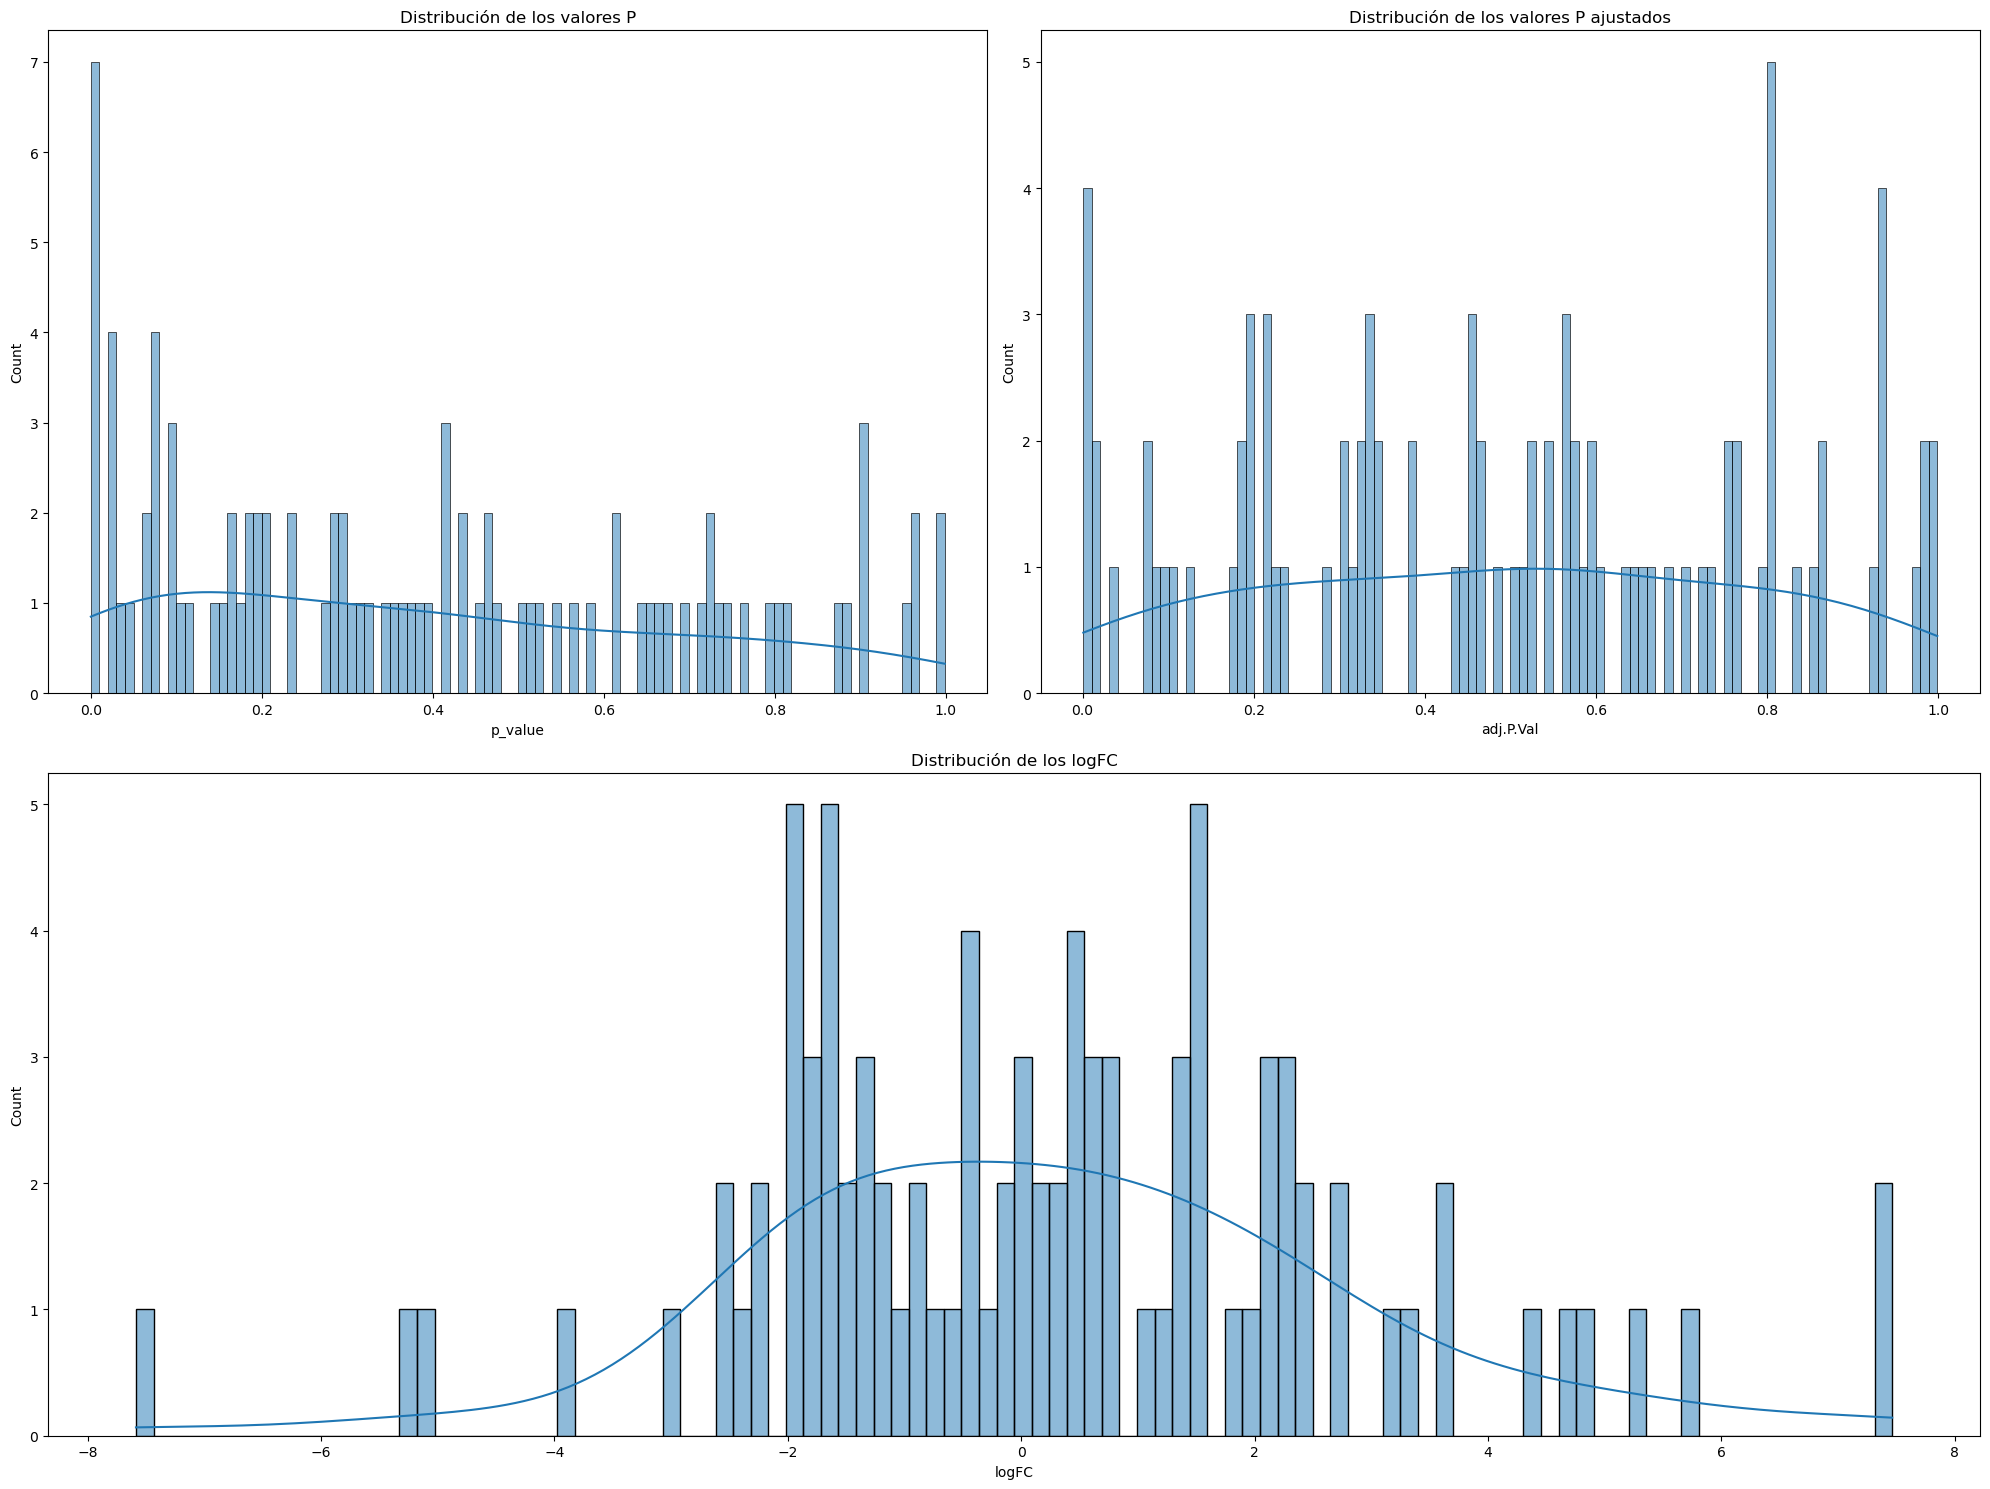

In [24]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(2, 2)  # 2 filas x 2 columnas

# Primera fila (dos gráficos)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Segunda fila (una sola gráfica que ocupa las dos columnas)
ax3 = fig.add_subplot(gs[1, :])

# Graficar
sns.histplot(df_proteomica_pre['p_value'], bins=100, kde=True, ax=ax1)
ax1.set_title('Distribución de los valores P')

sns.histplot(df_proteomica_pre['adj.P.Val'], bins=100, kde=True, ax=ax2)
ax2.set_title('Distribución de los valores P ajustados')

sns.histplot(df_proteomica_pre['logFC'], bins=100, kde=True, ax=ax3)
ax3.set_title('Distribución de los logFC')

plt.tight_layout()
plt.show()

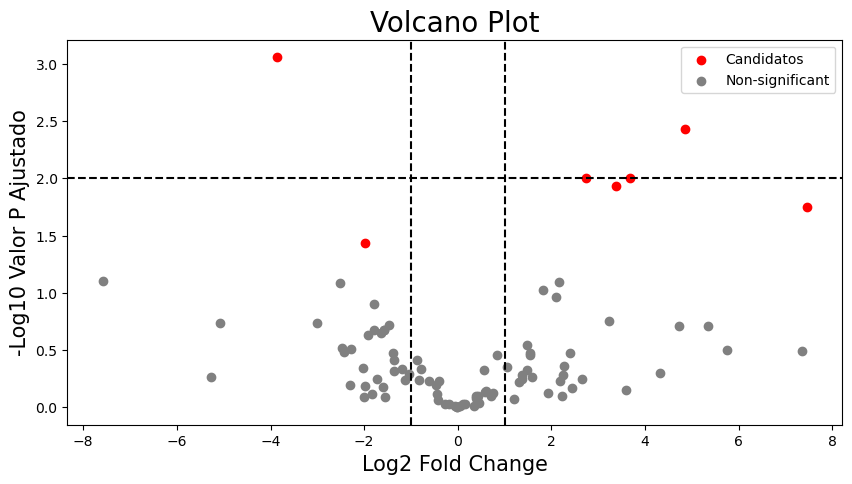

In [25]:
# Volcano plot

sig = df_proteomica_pre.loc[(df_proteomica_pre['adj.P.Val'] <= 0.05) & (abs(df_proteomica_pre['logFC']) > 1)]
non_sig = df_proteomica_pre.loc[~df_proteomica_pre.index.isin(sig.index)]

plt.figure(figsize=(10, 5))
plt.scatter(sig['logFC'], -np.log10(sig['adj.P.Val']), color='red', label='Candidatos')
plt.scatter(non_sig['logFC'], -np.log10(non_sig['adj.P.Val']), color='grey', label='Non-significant')
plt.axhline(y=-np.log10(0.01), color='black', linestyle='--')
plt.axvline(x=-1, color='black', linestyle='--')
plt.axvline(x=1, color='black', linestyle='--')
plt.xlabel('Log2 Fold Change', fontsize=15)
plt.ylabel('-Log10 Valor P Ajustado', fontsize=15)
plt.title('Volcano Plot', fontsize=20)
plt.legend(loc='best')
plt.show()
data_f = res_df.dropna(subset=['Gene.symbol'])


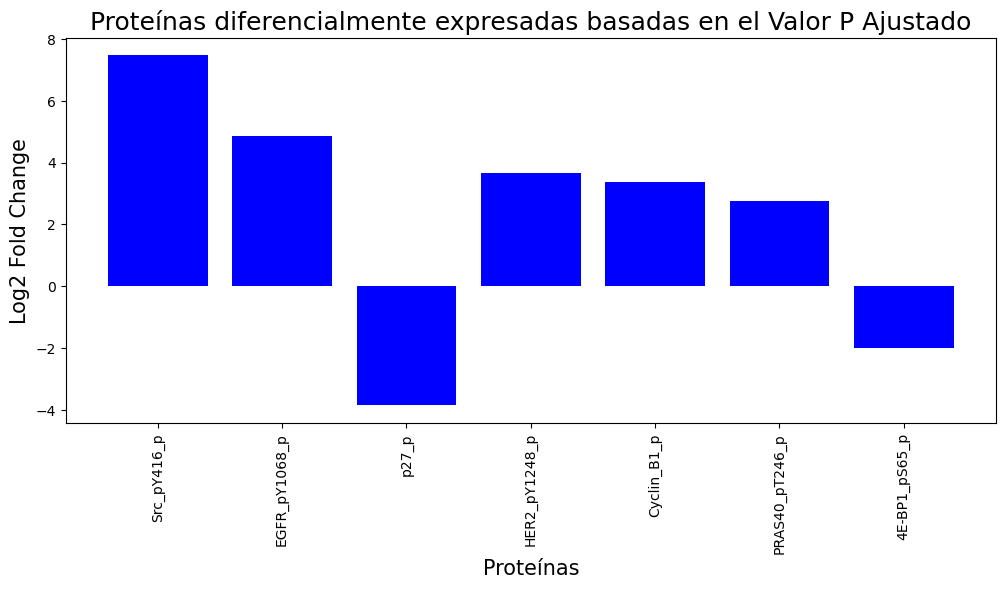

In [26]:
# Proteínas diferencialmente expresadas
plt.figure(figsize=(12,5))
plt.bar(sig['Protein'], sig['logFC'], color='blue')
plt.xlabel('Proteínas', fontsize=15)
plt.ylabel('Log2 Fold Change', fontsize=15)
plt.xticks(rotation=90)
plt.title('Proteínas diferencialmente expresadas basadas en el Valor P Ajustado', fontsize=18)
plt.show()

In [27]:
sig[['Protein', 'adj.P.Val', 'logFC']]

,Protein,adj.P.Val,logFC
1,Src_pY416_p,0.017681,7.463381
7,EGFR_pY1068_p,0.003745,4.844218
10,p27_p,0.000876,-3.858045
11,HER2_pY1248_p,0.009947,3.676464
13,Cyclin_B1_p,0.011747,3.378303
16,PRAS40_pT246_p,0.009947,2.741953
33,4E-BP1_pS65_p,0.036569,-1.991640
